<a href="https://colab.research.google.com/github/juelha/IANNWTF/blob/sabine/homework04_Sabine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set
The dataset we want you to
work on is the wine quality dataset, containing a set of collected features for each wine
and a rank of that wine as found by ’wine experts’ on the scale of 1 to 10.
You can also find this dataset in the Tensorflow Datasets Collection , however, as tfds
has been proven to be a bit difficult at times, this week we would like you to create your
own Tensoflow Dataset from a .csv using pandas 1
. Do not worry, this is very easy!



## 1.1 Load Data into a Dataframe
You can download the .csv and store it on your local computer or directly read in the
url when working with pandas. Read the data into a pandas dataframe. 2
1
Wine Quality Dataset: https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv
Make yourself familiar with the dataset.
• What keys are there?
• What should be the input and what should be the target for our NN? 3

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split
ds = pd.read_csv(
    "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep=";")

ds.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 1.2 Create a Tensorflow Dataset and a Dataset Pipeline
Split the dataset into a train, test and validation split.

Separate the labels from the input and store them accordingly. 5

Out of the resulting dataframes, build a Tensorflow Dataset.

6
Now we want to make this a Binary Classification Task: As we are not as sophisticated as our wine experts, we only care about good wine vs. bad wine. Write a function
make binary(target) that receives a target and returns a target fit for a binary classification task. 7 You can hardcode (i.e. fix) a threshold or use statistics obtained from
your data, e.g. the median ranking of all wines.8
Create a Data Pipeline with all the necessary steps. You should at least map the
make binary() function to the dataset and apply batching

In [2]:
# Graveyard attempt at full preprocessing pipeline 
'''
train, validate, test = np.split(ds.sample(frac=1), [int(.6*len(ds)), int(.8*len(ds))])
input_labels = ['fixed acidity',
        'volatile acidity',
        'citric acid',
        'residual sugar',
        'chlorides',
        'free sulfur dioxide',
        'total sulfur dioxide',
        'density',
        'pH',
        'sulphates',
        'alcohol']

print(train.head())

def prepare_wine_data(ds):
  ds =  pd.DataFrame({'features': [train[input_labels]], 'target': [train['quality']] })

  ds = (tf.data.Dataset.from_tensor_slices(
        (tf.cast(ds['features'].values, tf.float32), tf.cast(ds['target'].values, tf.int32))))
 
train_dataset = train.apply(prepare_wine_data)



def prepare_wine_data(ds):
  ds =  pd.DataFrame({'features': [ds.drop('quality', axis=1)], 'target': [ds['quality']] })

  ds = (tf.data.Dataset.from_tensor_slices(
        (tf.cast(ds['features'].values, tf.float32), tf.cast(target.values, tf.int32))))
  
  return ds

  #cache this progress in memory, as there is no need to redo it; it is deterministic after all
  mnist = mnist.cache()
  #shuffle, batch, prefetch
  mnist = mnist.shuffle(1000)
  mnist = mnist.batch(32)
  mnist = mnist.prefetch(20)
  #return preprocessed dataset
  return mnist

''' 

"\ntrain, validate, test = np.split(ds.sample(frac=1), [int(.6*len(ds)), int(.8*len(ds))])\ninput_labels = ['fixed acidity',\n        'volatile acidity',\n        'citric acid',\n        'residual sugar',\n        'chlorides',\n        'free sulfur dioxide',\n        'total sulfur dioxide',\n        'density',\n        'pH',\n        'sulphates',\n        'alcohol']\n\nprint(train.head())\n\ndef prepare_wine_data(ds):\n  ds =  pd.DataFrame({'features': [train[input_labels]], 'target': [train['quality']] })\n\n  ds = (tf.data.Dataset.from_tensor_slices(\n        (tf.cast(ds['features'].values, tf.float32), tf.cast(ds['target'].values, tf.int32))))\n \ntrain_dataset = train.apply(prepare_wine_data)\n\n\n\ndef prepare_wine_data(ds):\n  ds =  pd.DataFrame({'features': [ds.drop('quality', axis=1)], 'target': [ds['quality']] })\n\n  ds = (tf.data.Dataset.from_tensor_slices(\n        (tf.cast(ds['features'].values, tf.float32), tf.cast(target.values, tf.int32))))\n  \n  return ds\n\n  #cache 

In [3]:
# TO DO: make this more efficient with a function

# splitting into train, validate and test
train, validate, test_ = np.split(ds.sample(frac=1), [int(.6*len(ds)), int(.8*len(ds))])

# splitting features and targets
input_labels = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides',
                'free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol']

input_train = train[input_labels]
target_train = train['quality']

input_validate = validate[input_labels]
target_validate = validate['quality']

input_test = test_[input_labels]
target_test = test_['quality']

# casting dataframe into tensor
training_ds = (tf.data.Dataset.from_tensor_slices(
        (tf.cast(input_train.values, tf.float32), tf.cast(target_train.values, tf.int32))))

validation_ds = (tf.data.Dataset.from_tensor_slices(
        (tf.cast(input_validate.values, tf.float32), tf.cast(target_validate.values, tf.int32))))

test_ds = (tf.data.Dataset.from_tensor_slices(
        (tf.cast(input_test.values, tf.float32), tf.cast(target_test.values, tf.int32))))

# Make_binary function
median_quality = np.median(target_train)

def make_binary(target):
  return(tf.expand_dims(target >= median_quality, -1))

# TO DO Include the above preprocessing into the pipeline

# Pipeline
def pipeline(df):
  df = df.map(lambda features, target: (features, make_binary(target)))
  df = df.cache()
  df = df.shuffle(50)
  df = df.batch(32)
  df = df.prefetch(20)
  return df

train_dataset = training_ds.apply(pipeline)
validate_dataset =validation_ds.apply(pipeline)
test_dataset = test_ds.apply(pipeline)


#  Model

You can pretty much recycle the model you defined for last week’s task with some small
modifications.
• As the task is maybe a bit simpler and you are aiming to explore the effect of
optimization techniques, also try to make your model a bit smaller. The baseline
model should barely be able to perform sufficiently good at the task (better than
random).
• As we now are dealing with a binary classification task, you have to change the
configuration of the output layer. 9



In [4]:
class MyModel(tf.keras.Model):
    
    def __init__(self):
        super(MyModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(16, activation=tf.sigmoid, kernel_regularizer='l1_l2')
        self.dense2 = tf.keras.layers.Dense(16, activation=tf.sigmoid)
        self.out = tf.keras.layers.Dense(1, activation=tf.sigmoid)
        self.dropout_layer = tf.keras.layers.Dropout(rate=0.2)


    @tf.function
    def call(self, inputs, training=None):
        x = self.dense1(inputs)
        #x = self.dropout_layer(x, training = training)
        x = self.dense2(x)
        #x = self.dropout_layer(x, training = training)
        x = self.out(x)
        return x
    

In [5]:
def train_step(model, input, target, loss_function, optimizer):
  # loss_object and optimizer_object are instances of respective tensorflow classes
  with tf.GradientTape() as tape:
    prediction = model(input)
    loss = loss_function(target, prediction)
    gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss

def test(model, test_data, loss_function):
  # test over complete test data

  test_accuracy_aggregator = []
  test_loss_aggregator = []

  for (input, target) in test_data:
    #print(input, target)
    prediction = model(input)
    sample_test_loss = loss_function(target, prediction)
    #print('loss=', sample_test_loss)
    sample_test_accuracy =  target == np.round(prediction, 0)
    #print('bool=', sample_test_accuracy)
    sample_test_accuracy = np.mean(sample_test_accuracy)
    #print('accuracy-mean=', sample_test_accuracy)
    test_loss_aggregator.append(sample_test_loss.numpy())
    test_accuracy_aggregator.append(np.mean(sample_test_accuracy))
    #print('aggregator=', test_accuracy_aggregator)

  test_loss = tf.reduce_mean(test_loss_aggregator)
  test_accuracy = tf.reduce_mean(test_accuracy_aggregator)
  #print('reduced mean loss and accuracy =', test_loss, test_accuracy)

  return test_loss, test_accuracy

In [6]:
tf.keras.backend.clear_session()

#For showcasing we only use a subset of the training and test data (generally use all of the available data!)
#train_dataset = train_dataset.take(1000)
#test_dataset = test_dataset.take(100)

### Hyperparameters
num_epochs = 10
learning_rate = 0.1

# Initialize the model.
model = MyModel()
# Initialize the loss: categorical cross entropy. Check out 'tf.keras.losses'.
cross_entropy_loss = tf.keras.losses.BinaryCrossentropy()
# Initialize the optimizer: SGD with default parameters. Check out 'tf.keras.optimizers'
optimizer = tf.keras.optimizers.SGD(learning_rate)

# Initialize lists for later visualization.
train_losses = []

test_losses = []
test_accuracies = []

#testing once before we begin
test_loss, test_accuracy = test(model, test_dataset, cross_entropy_loss)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

#check how model performs on train data once before we begin
train_loss, _ = test(model, train_dataset, cross_entropy_loss)
train_losses.append(train_loss)

# We train for num_epochs epochs.
for epoch in range(num_epochs):
    print(f'Epoch: {str(epoch)} starting with accuracy {test_accuracies[-1]}')

    #training (and checking in with training)
    epoch_loss_agg = []
    for input,target in train_dataset:
        train_loss = train_step(model, input, target, cross_entropy_loss, optimizer)
        epoch_loss_agg.append(train_loss)
    
    #track training loss
    train_losses.append(tf.reduce_mean(epoch_loss_agg))

    #testing, so we can track accuracy and test loss
    test_loss, test_accuracy = test(model, test_dataset, cross_entropy_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch: 0 starting with accuracy 0.54375
Epoch: 1 starting with accuracy 0.6375
Epoch: 2 starting with accuracy 0.653125
Epoch: 3 starting with accuracy 0.6375
Epoch: 4 starting with accuracy 0.63125
Epoch: 5 starting with accuracy 0.63125
Epoch: 6 starting with accuracy 0.61875
Epoch: 7 starting with accuracy 0.634375
Epoch: 8 starting with accuracy 0.6125
Epoch: 9 starting with accuracy 0.61875


# 4 Fine-Tuning

Now comes the fun part. Your task is to apply at least 3 optimization and regularization
techniques featured in the lecture with the goal to significantly increase your model’s
performance. 12
You can also think about another approach and normalize the input data. 13
In the end, everything is up to you! You should witness an increase in performance,
stability, and generalization.
You may notice that some optimization techniques such as dropout seem to rather
decrease performance. However, please bear in mind that these techniques often address
ensuring better generalization. So before you start going all out on the test set, don’t
forget what the validation set is for.

In [7]:
'''
# Baselines
Epoch: 0 starting with accuracy 0.4625
Epoch: 1 starting with accuracy 0.5375
Epoch: 2 starting with accuracy 0.5375
Epoch: 3 starting with accuracy 0.5375
Epoch: 4 starting with accuracy 0.58125
Epoch: 5 starting with accuracy 0.575
Epoch: 6 starting with accuracy 0.609375
Epoch: 7 starting with accuracy 0.609375
Epoch: 8 starting with accuracy 0.6125
Epoch: 9 starting with accuracy 0.6125
'''

'\n# Baselines\nEpoch: 0 starting with accuracy 0.4625\nEpoch: 1 starting with accuracy 0.5375\nEpoch: 2 starting with accuracy 0.5375\nEpoch: 3 starting with accuracy 0.5375\nEpoch: 4 starting with accuracy 0.58125\nEpoch: 5 starting with accuracy 0.575\nEpoch: 6 starting with accuracy 0.609375\nEpoch: 7 starting with accuracy 0.609375\nEpoch: 8 starting with accuracy 0.6125\nEpoch: 9 starting with accuracy 0.6125\n'

# Visualisation

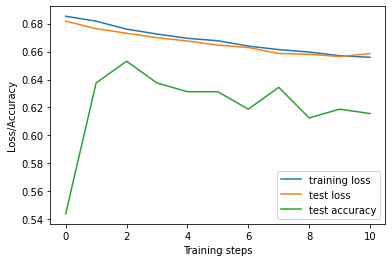

In [8]:
import matplotlib.pyplot as plt

# Visualize accuracy and loss for training and test data.
plt.figure()
line1, = plt.plot(train_losses)
line2, = plt.plot(test_losses)
line3, = plt.plot(test_accuracies)
plt.xlabel("Training steps")
plt.ylabel("Loss/Accuracy")
plt.legend((line1,line2, line3),("training loss","test loss", "test accuracy"))
plt.show()